In [1]:
import requests
from IPython.core.display import HTML

# Evaluating Classifiers
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.

**Info**
Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive



<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training Support Vector Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Performance metrics</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data

---
**Task 1 (easy): Generating Data👩‍💻**
1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 

---
**Task 2 (easy): Training Support Vector Classifier👩‍💻**
1. Run the cell below to train a Linear Support Vector Classifier ([`LinearSVC`
](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
).


---

In [3]:
classifier1 = LinearSVC(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)

LinearSVC(C=0.1, random_state=1)


---
**Task 3 (easy): Model accuracy👩‍💻**
Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `LinearSVC`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 


---

Training Accuracy: 0.9525
Test Accuracy: 0.93


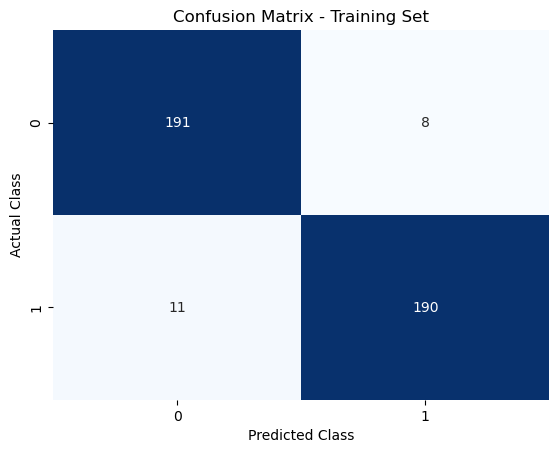

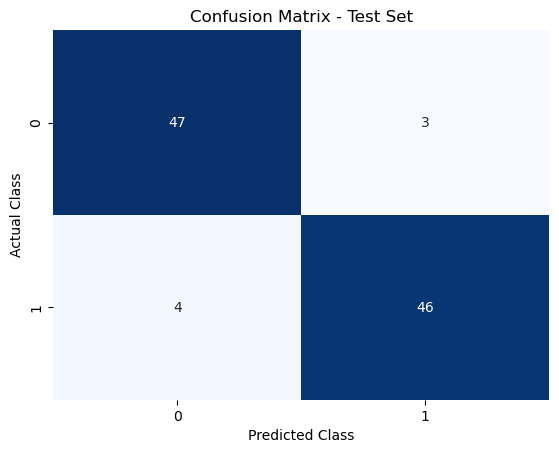

In [4]:
Y_preds_on_test = classifier1.predict(X_test)
Y_preds_on_train = classifier1.predict(X_train)

# 1.Model accuracy on the training set
train_accuracy = accuracy_score(Y_train, Y_preds_on_train)
print("Training Accuracy:", train_accuracy)

# 2. Model accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_preds_on_test)
print("Test Accuracy:", test_accuracy)

# 3. Confusion matrix for the training set
conf_mat_train = confusion_matrix(Y_train, Y_preds_on_train)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# 4. Confusion matrix for the test set
conf_mat_test = confusion_matrix(Y_test, Y_preds_on_test)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Performance metrics**

**Recall from the lecture**
Performance metrics such as **precision**, **recall**, **F$_1$-score**, and **specificity**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F1-score** - harmonic mean of precision & recall. 

$$
2∗\frac{\text{Precision}∗\text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$





---
**Task 4 (easy): Performance metrics👩‍💻💡**
1. Use the confusion matrix from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity


3. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?



---

In [5]:
TP = 9
TN = 87
FP = 96
FN = 8
Precision=      TP/(TP + FP)
Recall=         TP/(TP + FN)
F1_score=       2 * Precision * Recall / (Precision + Recall)
Specificity=    TN/(TN + FP)
print("Precision", Precision)
print("Recall", Recall)
print("F1_score", F1_score)
print("Specificity", Specificity)

Precision 0.08571428571428572
Recall 0.5294117647058824
F1_score 0.14754098360655737
Specificity 0.47540983606557374


## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [6]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 5 (hard): Class Imbalance👩‍💻💡**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop to:
    - Train `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate accuracy on the validation folds and store the values.


2. Run the cell below to plot the accuracy of the model on each fold. What does the plot tell you about classification performance?

3. Extend the loop to calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 

4. Why do some of the metrics return NaNs?

5. Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?

6. Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?



---

Average Accuracy: 0.909
Average Precision: 1.0
Average Recall: 0.08281733746130031
Average F1-Score: 0.14885500972457494
Average Specificity: 1.0


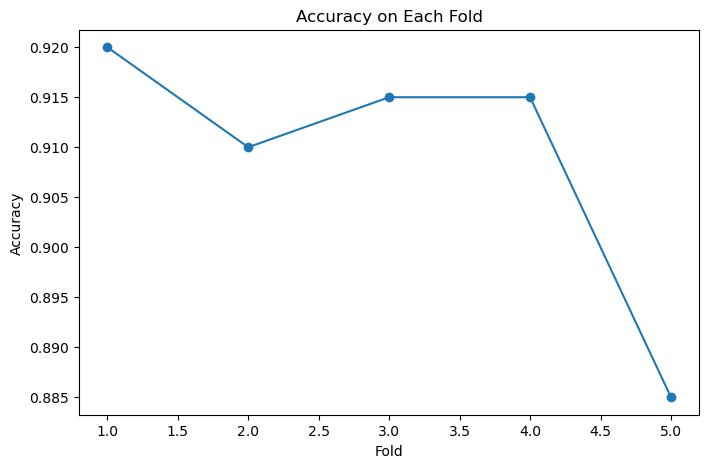

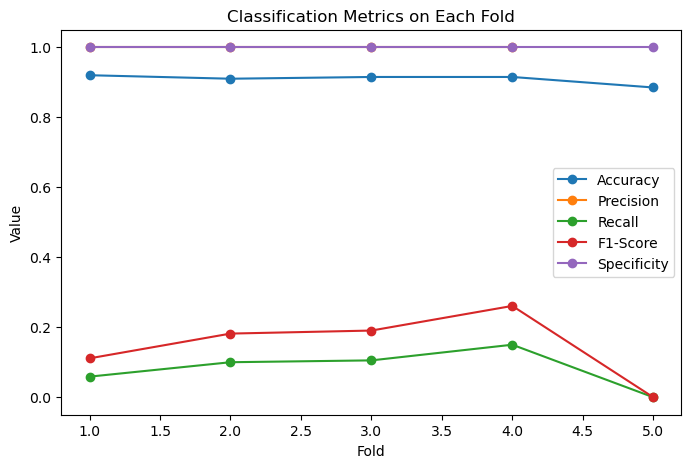

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Given classifier and initialization (Subtask 1)
classifier2 = SVC()

# Initialize lists for metrics
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Subtask 1: Complete the loop to train, predict, and store accuracy
for train_idx_svc, test_idx_svc in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]
    
    # Train the classifier on the training set
    classifier2.fit(X_train, Y_train)
    
    # Predict on the validation set
    Y_pred = classifier2.predict(X_test)
    
    # Calculate and store accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    
    # Subtask 3: Calculate and store additional metrics (precision, recall, F1-score, and specificity)
    precision = precision_score(Y_test, Y_pred, zero_division=np.nan)
    recall = recall_score(Y_test, Y_pred, zero_division=np.nan)
    f1 = f1_score(Y_test, Y_pred, zero_division=np.nan)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Calculate confusion matrix and specificity
    cm = confusion_matrix(Y_test, Y_pred)
    if cm.shape == (2, 2):  # Check if confusion matrix is 2x2
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    else:
        specificity = np.nan
    specificities.append(specificity)

# Subtask 3: Print average metrics
print("Average Accuracy:", np.nanmean(accuracies))
print("Average Precision:", np.nanmean(precisions))
print("Average Recall:", np.nanmean(recalls))
print("Average F1-Score:", np.nanmean(f1_scores))
print("Average Specificity:", np.nanmean(specificities))

# Subtask 2: Run the cell to plot accuracy per fold
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# Subtask 6: Plot all metrics per fold
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
metric_values = [accuracies, precisions, recalls, f1_scores, specificities]

plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()

## Task 5 reflections


**What does the plot tell you about classification performance?**

The accuracy is still high, around 90%, indicating that most of the predictions were correct. 
But to be fair, it would get 90% accuracy, by just guessing all samples as False.

**Why do some metrics return NaNs?**

Some metrics may return NaNs because there could be situations where the denominator in their calculation becomes zero. For example:

* Precision: If there are no positive predictions (i.e., the model predicted all instances as negative), the precision calculation will involve dividing by zero, leading to NaN.


**Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?**

No. The very low recall indicates that a lot of positives were missed (many false negatives compared to true positives).

**Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?**

The specificity is near 100% while the recall is close to 0%. This indicates the the model may be too negative by predicting too many negatives, this also leads to a very low F1 score. Since the data is imbalanced with a lot of negatives, it makes sence that a very pessimistic model will get a high accuracy.

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.

---
**Task 6 (medium): ROC and Precision-Recall curves👩‍💻💡**
The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.
2. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
3. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

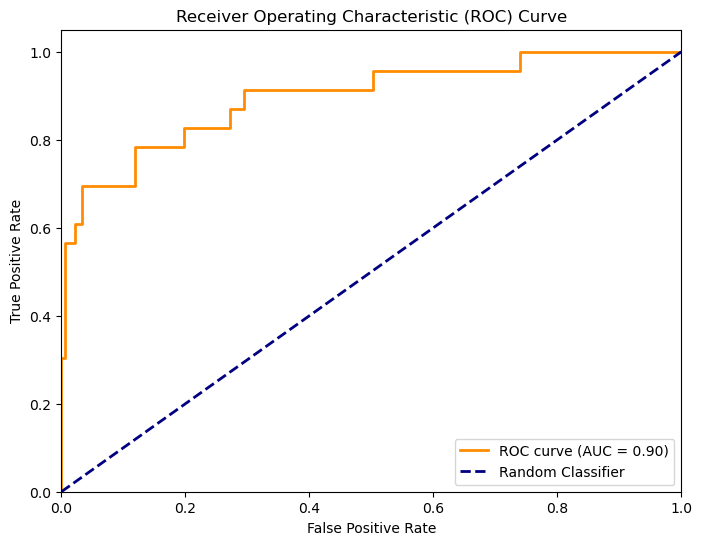

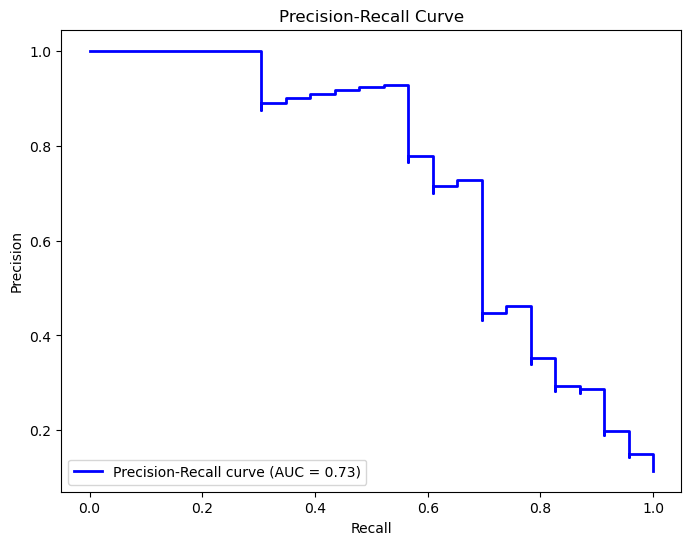

In [8]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## Task 6

### Insights

**ROC**
* x-axis: False positive rate. (How many did we label positive wrongly) We want as low as possible
* y-axis: True positive rate (Recall) (how many of all the true did we find) We want as high as possible.

**ROC Curve Insights:**

The recall quickly becomes very high because only a small percentage of the data is actually positive. This may give a false impression that the model is performing well even though we have a high rate of false positives.


**Precision-Recall Curve** 

* x-axis: Recall (True Positive Rate) (how many of all the true did we find) We want as high as possible.
* y-axis: Precision (How many of the predicted positives are actually positive) We want as high as possible.

**Precision-Recall Curve Insights:**

They both show recall. But differs on the other axis.

False positive rate (FPR) vs precision:
* False positive rate (FPR): The proportion of actual negative cases that were incorrectly classified as positive:
* Precision: The proportion of true positive predictions out of all positive predictions made by the model:

In short, precision directly reflects the effect of false positives, whereas the false positive rate gives an overview of incorrect positive classifications relative to all negatives

Therefore Precision-Recall Curve is Preferred for imbalanced datasets with a low positive rate, where you want to focus on detecting true positives while minimizing false positives


### When to Prioritize One Curve Over the Other

**Prioritize the ROC Curve:**

When the classes are balanced or when both positive and negative outcomes are equally important.
It gives a good overall view of the model's ability to distinguish between classes, especially when both TPR and FPR matter.
For example, in cases where you need a general measure of performance without focusing solely on one class (e.g., binary classification with balanced classes).

**Prioritize the Precision-Recall Curve:**

When dealing with imbalanced data with many negatives, where a precision recall plays a big part, since few positives could make a model overly pessimistic, the Precision-recall curve is preferable.

# EXAM


## A: Metrics of classifiers

### Starting simple with accuracy

Accuracy= total correct predictions / total number of predictions

But what if i have 90% true apples, and 10% false oranges



### Different metrics, for different purposes

**Precision is important. Spam email**

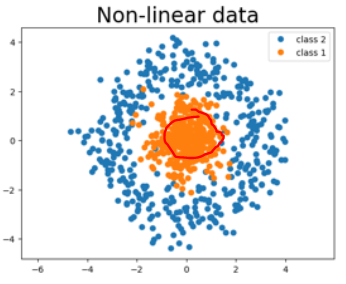

**Recall is important. Cancer detection**

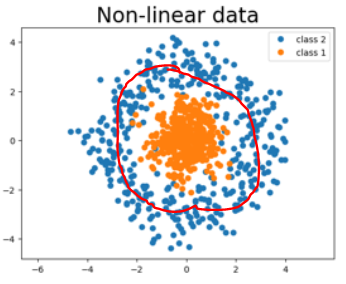

Notice how this undesirably increases FPR used in ROC,because 
* more points are labeled true, while actually being false (False positives)
* Less points are labeled false, while being false (True negatives)


**Confusion matrix and curves**

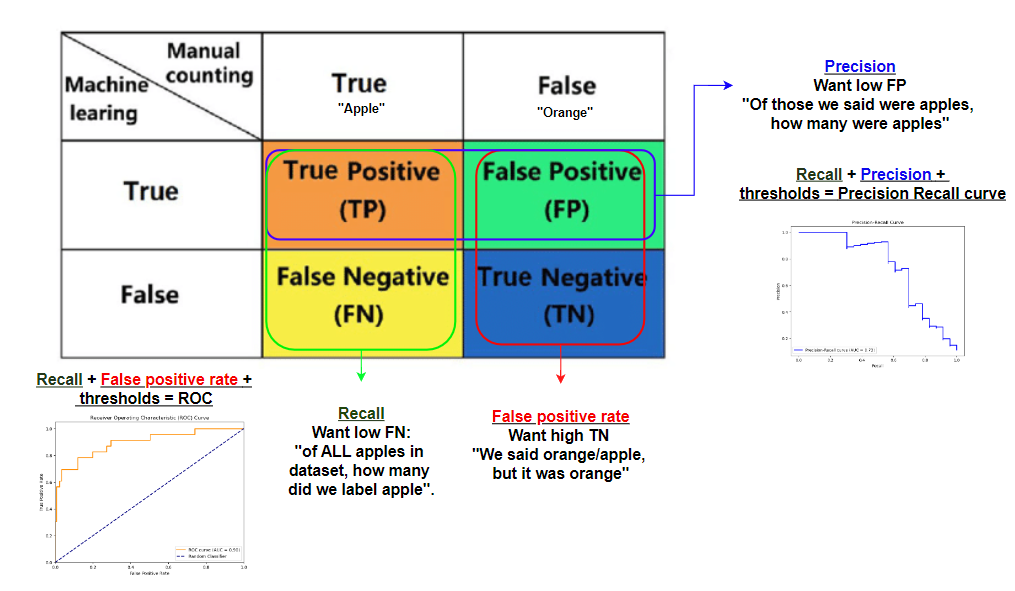

**Explain it  very simply with data being:**

Precision-recall, kigger kun på den "true" klasse, sørger for at vi får dem alle samt at dem vi mener er true, rent faktisk er true.
ROC, derimod kigger også på vores negative labels, hvor den ikke ønsker at vi klassificere false ting som true.



90 % apples (true) and 10 % oranges (false)
Okay, let's look at this updated information in a simple way.
Imagine you have a dataset where 90% of the items are actually apples, but 10% are incorrectly labeled as oranges. This is an example of an imbalanced dataset.
In this case, the Precision-Recall (PR) curve is a better choice than the Receiver Operating Characteristic (ROC) curve to evaluate the model's performance.
The reason is that the PR curve focuses on how well the model can correctly identify the apples (the majority class) compared to incorrectly identifying oranges (the minority class).
The ROC curve, on the other hand, looks at the overall balance between correctly identifying apples and incorrectly identifying oranges. But since the data is so imbalanced, with far more apples than oranges, the ROC curve may not give you as clear a picture of how well the model is performing on the minority orange class.
So for datasets with this kind of imbalance, where 90% of the data is truly apples but 10% is incorrectly labeled as oranges, the PR curve provides more meaningful insights about the model's ability to accurately identify the minority class.
Does this make sense? Let me know if you need any clarification on the differences between the PR and ROC curves for imbalanced data.

### F1 and MCC
